In [1]:
### Local imports ###
import sys
sys.path.append('../') # define relative path for local imports
from src.models.scm import SCM
from src.datasets.dataset import SCMDataset


In [6]:
from refiners.training_utils.config import BaseConfig

class SCMConfig(BaseConfig):
    path_generated_images : str
    path_garment_images : str
    training : dict




config = SCMConfig.load_from_toml("/home/daniel/work/vton/configs/config_scm.toml")

In [9]:
path_generated_images = "/var/hub/VITON-HD-results-ladi-vton"
path_garment_images = "/var/hub/VITON-HD/test"
mode = "train"

dataset = SCMDataset(path_generated_images, path_garment_images, mode)
elemt = dataset[1]



In [10]:
# Display different images
import PIL  
import numpy as np
import matplotlib.pyplot as plt
from refiners.fluxion.utils import tensor_to_image

def display_image(image):
    image_to_display = tensor_to_image(image.unsqueeze(0))
    plt.imshow(image_to_display)
    plt.show()

09520_00.jpg


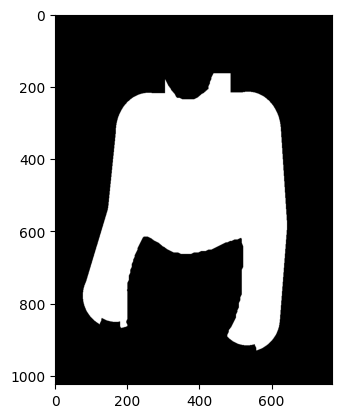

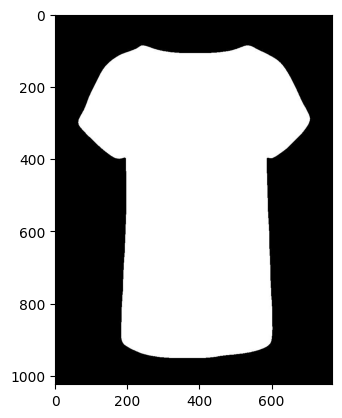

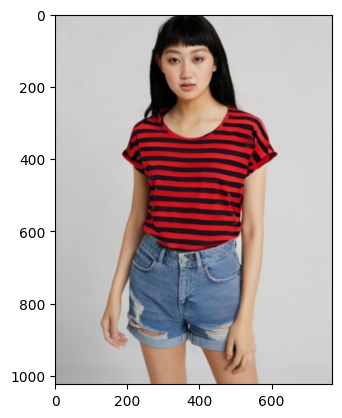

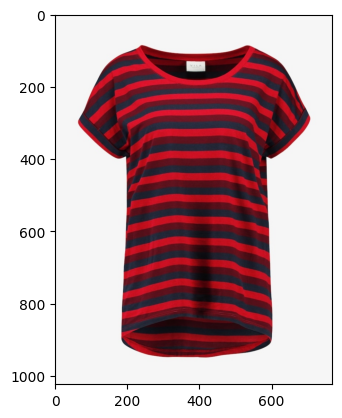

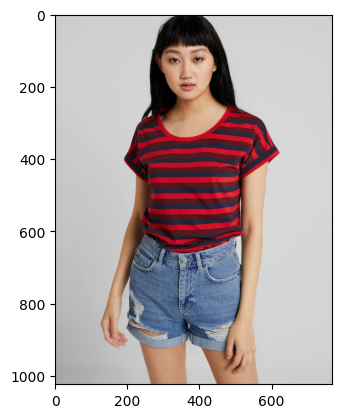

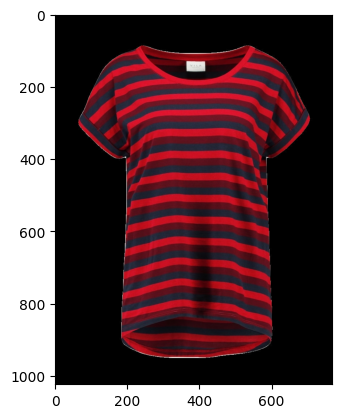

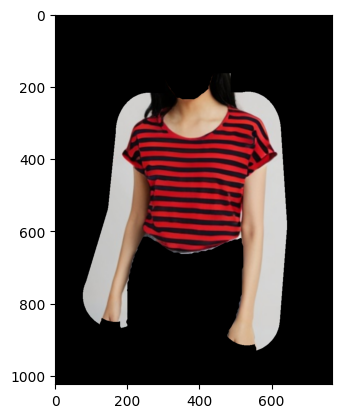

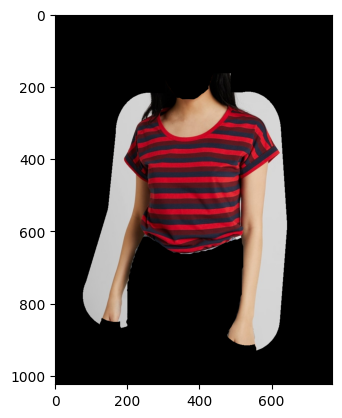

In [11]:

print(elemt["file_name"])
for key in [
        "model_mask",
        "cloth_mask",
        "model_generated",
        "cloth",
        "model_real",
        "input_cloth",
        "input_model_generate",
        "target",
    ]:
    display_image(elemt[key])



In [12]:
model = SCM()


In [13]:
import torch

batch = elemt["input_scm"].unsqueeze(0)
with torch.no_grad():
    out = model(batch)
    print(out.shape)


    

torch.Size([1, 3, 1024, 768])


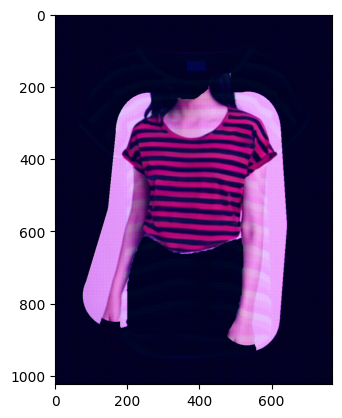

In [14]:
display_image(out[0])